In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline

In [ ]:
df=pd.read_csv(r"ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Dropping the columns which are not co-related to output

In [ ]:
df = df.drop(columns=['Height', 'Weight'])
print(df.shape)

(2111, 15)


In [ ]:
df[df.isnull().any(axis=1)]


,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [ ]:
df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**Handling missing values**

In [ ]:
df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

# Handling numerical and categorical values

In [ ]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [ ]:
print("numerical_columns:",numerical_columns)
print("categorical_columns:",categorical_columns)

numerical_columns: Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
categorical_columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


# Graph Plot

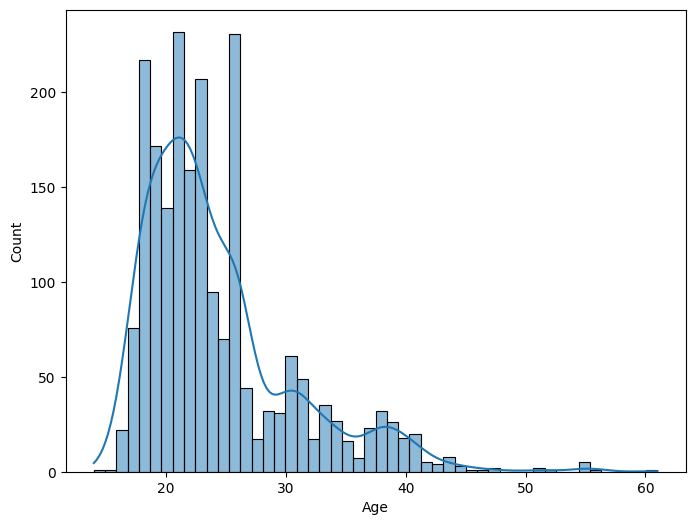

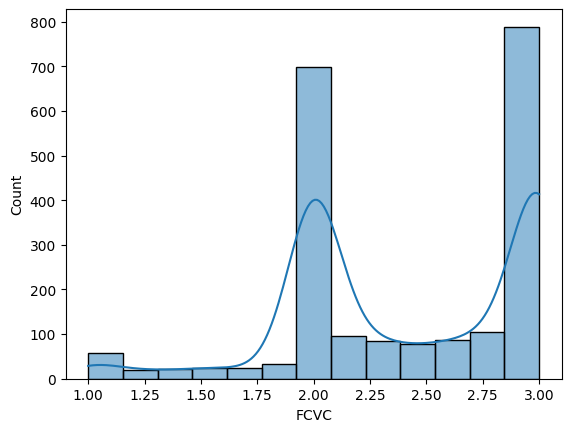

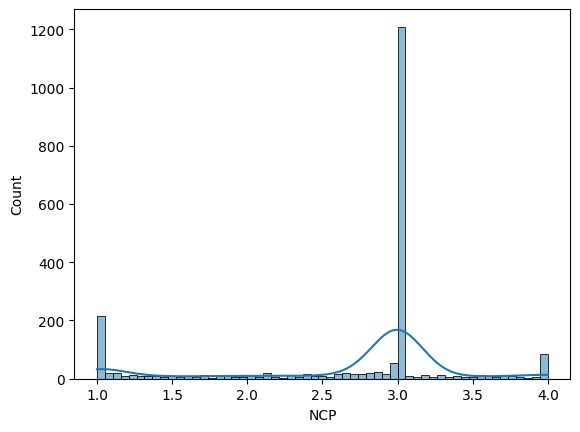

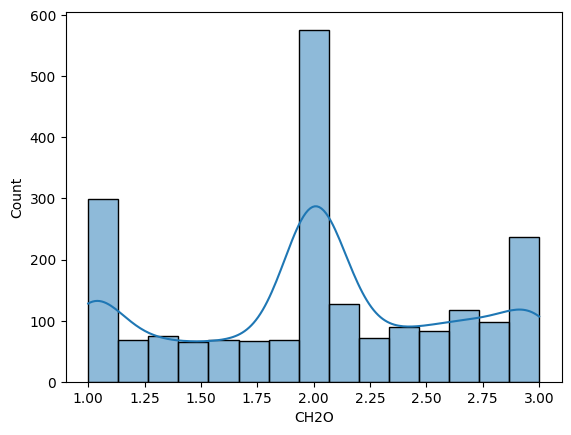

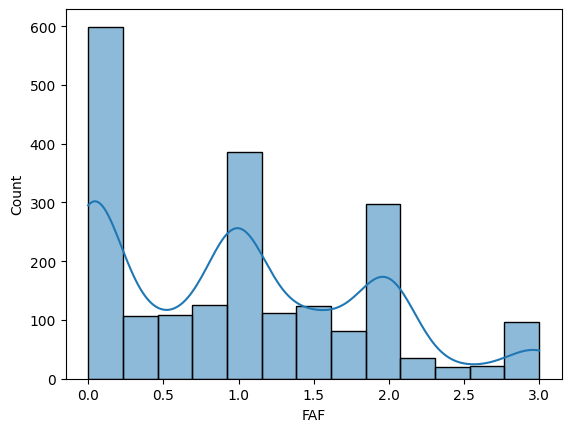

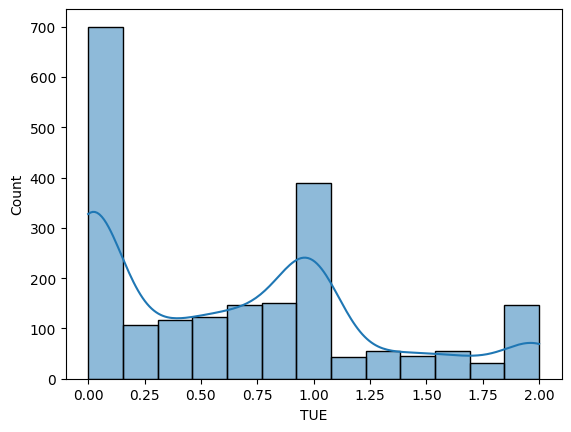

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Figure size 800x600 with 0 Axes>

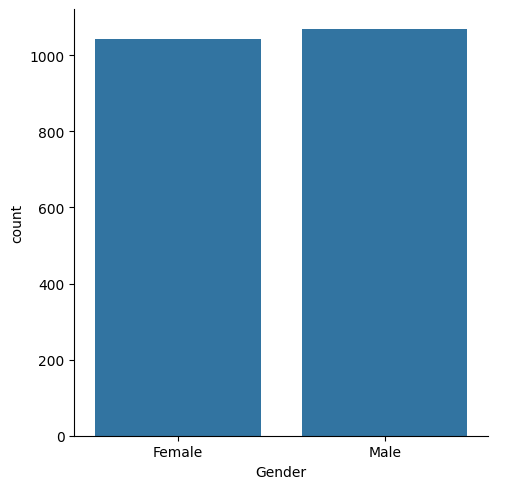

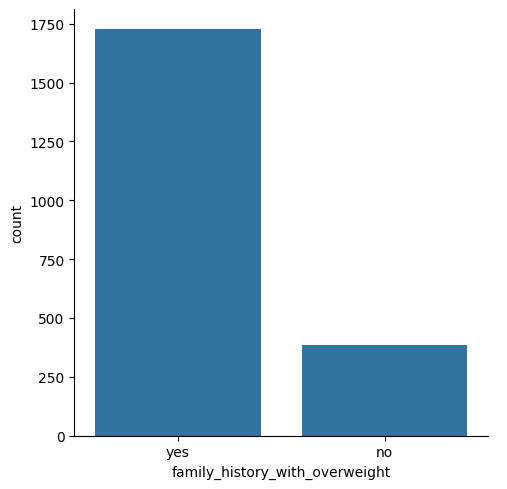

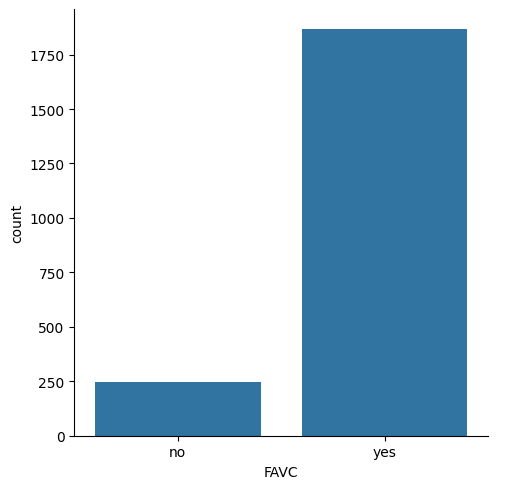

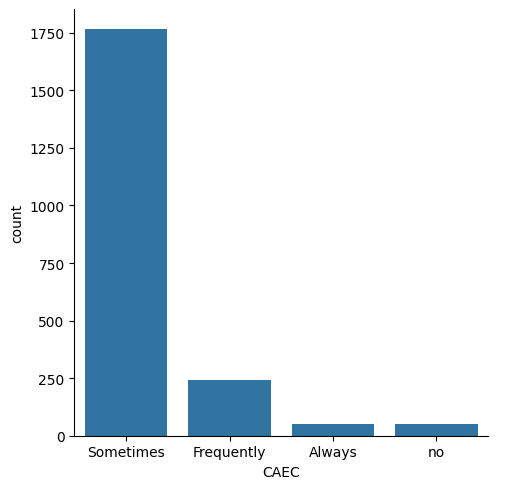

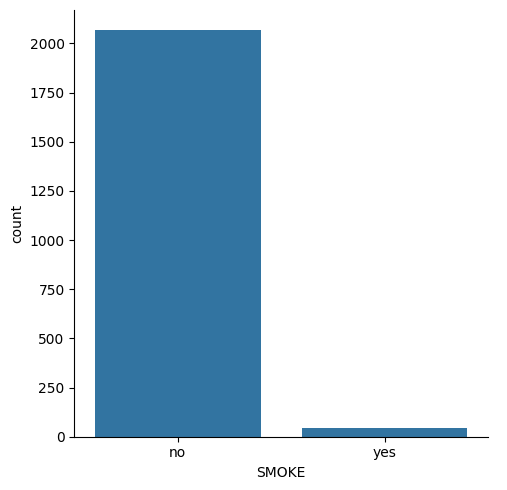

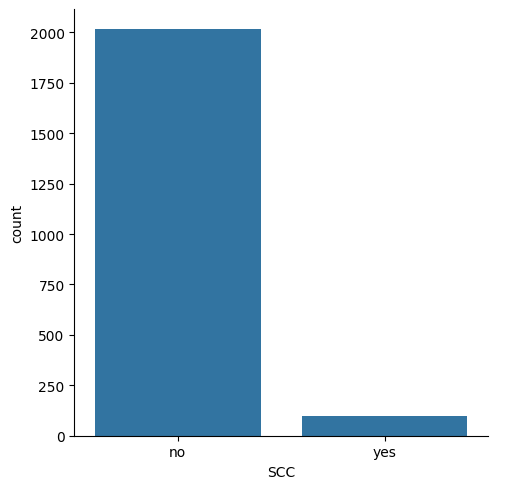

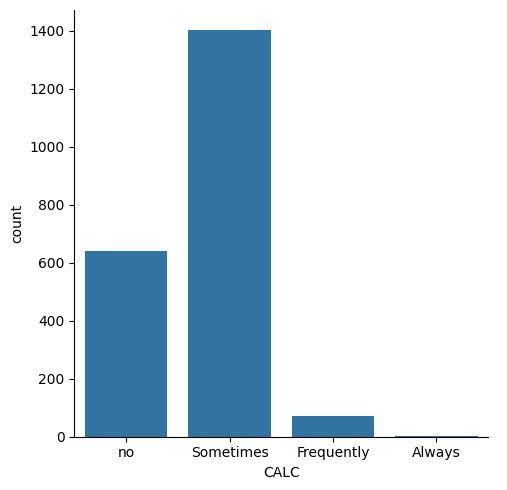

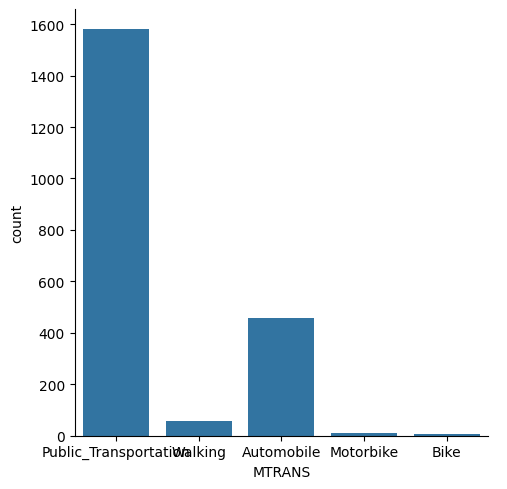

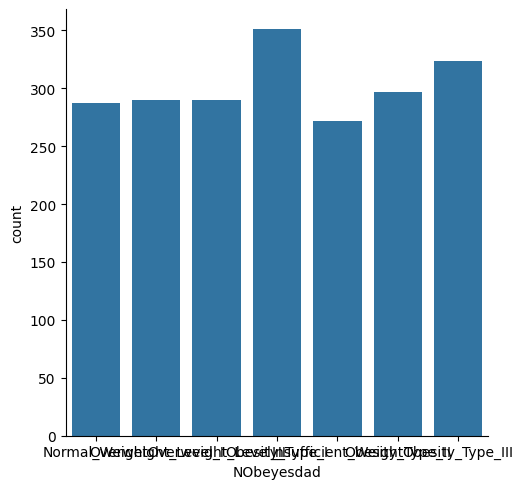

In [ ]:
plt.figure(figsize=(8,6))
for i in categorical_columns:
    sns.catplot(data=df,x=i,kind='count')
    print('\n')
    plt.show()

# corelation

<Axes: >

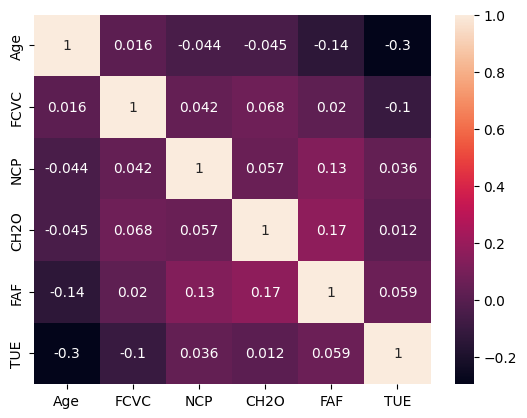

In [ ]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [ ]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
for i in categorical_columns:
  print(i)

Gender
family_history_with_overweight
FAVC
CAEC
SMOKE
SCC
CALC
MTRANS
NObeyesdad


In [ ]:
for i in categorical_columns:
  print(df[i].value_counts())
  print()
  print('---------------------')
  print()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

---------------------

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

---------------------

FAVC
yes    1866
no      245
Name: count, dtype: int64

---------------------

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

---------------------

SMOKE
no     2067
yes      44
Name: count, dtype: int64

---------------------

SCC
no     2015
yes      96
Name: count, dtype: int64

---------------------

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

---------------------

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

---------------------

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight

In [ ]:
for i in numerical_columns:
  print(df[i].value_counts())
  print()
  print('---------------------')
  print()

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

---------------------

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

---------------------

NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64

---------------------

CH2O
2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: count, Length: 1268, dtype: int64

---------------------

FA

In [ ]:
df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
X=df.drop(['NObeyesdad'],axis=1)
Y=df[['NObeyesdad']]

In [ ]:
X

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [ ]:
Y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [ ]:
NObeyesdad_cat=['Obesity_Type_I','Obesity_Type_III','Obesity_Type_II','Overweight_Level_I','Overweight_Level_II','Normal_Weight','Insufficient_Weight']

In [ ]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [ ]:
categorical_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [ ]:
numerical_cols

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [ ]:
Gender_cat=['Male','Female']
family_history_with_overweight_cat=['yes','no']
FAVC_cat=['yes','no']
CAEC_cat=[ 'Sometimes','no','Frequently','Always']
SMOKE_cat=['yes','no']
SCC_cat=['yes','no']
CALC_cat=[ 'Sometimes','no','Frequently','Always']
MTRANS_cat=['Public_Transportation','Automobile','Walking','Motorbike','Bike']
NObeyesdad_cat=['Obesity_Type_I','Obesity_Type_III','Obesity_Type_II','Overweight_Level_I','Overweight_Level_II','Normal_Weight','Insufficient_Weight']

# ModelPipeline conversion

In [ ]:
import pandas as pd


In [ ]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
w = [{
    "Gender": 'Female',
    "Age": 21,
    "family_history_with_overweight":'yes',
    "FAVC": 'no',
    "FCVC": 2.0,
    "NCP": 3.0,
    "CAEC": 'Sometimes',
    "SMOKE": 'no',
    "CH2O": 2.0,
    "SCC": 'no',
    "FAF": 0.0,
    "TUE": 1.0,
    "CALC": 'Sometimes',  # Corrected value
    "MTRANS": 'Public_Transportation'
}]

In [ ]:
f=pd.DataFrame(w)

In [ ]:
def Transform_data(fr,df):

  df = df.drop(columns=['Height', 'Weight'])
  X=df.drop(['NObeyesdad'],axis=1)
  Y=df[['NObeyesdad']]

  numerical_cols=['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
  categorical_cols=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']



  Gender_cat=['Male','Female']
  family_history_with_overweight_cat=['yes','no']
  FAVC_cat=['yes','no']
  CAEC_cat=[ 'Sometimes','no','Frequently','Always']
  SMOKE_cat=['yes','no']
  SCC_cat=['yes','no']
  CALC_cat=[ 'Sometimes','no','Frequently','Always']
  MTRANS_cat=['Public_Transportation','Automobile','Walking','Motorbike','Bike']




  ## Numerical Pipeline
  num_pipeline=Pipeline(
      steps=[
     ('imputer',SimpleImputer(strategy='median')),
     ('scaler',StandardScaler())

     ]

  )

# Categorigal Pipeline
  cat_pipeline=Pipeline(
      steps=[
      ('imputer',SimpleImputer(strategy='most_frequent')),
      ('ordinalencoder',OrdinalEncoder(categories=[Gender_cat,family_history_with_overweight_cat,FAVC_cat,CAEC_cat,SMOKE_cat,SCC_cat,CALC_cat,MTRANS_cat])),
      ('scaler',StandardScaler())
      ]

  )

  preprocessor=ColumnTransformer([
  ('num_pipeline',num_pipeline,numerical_cols),
  ('cat_pipeline',cat_pipeline,categorical_cols)
  ])



  X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)
  X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
  X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())


  c = pd.DataFrame(preprocessor.transform(fr), columns=preprocessor.get_feature_names_out())

  return pd.DataFrame(c)




In [ ]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
print(Transform_data(f,df))

   num_pipeline__Age  num_pipeline__FCVC  num_pipeline__NCP  \
0          -0.507814           -0.791612           0.406076   

   num_pipeline__CH2O  num_pipeline__FAF  num_pipeline__TUE  \
0           -0.040542          -1.179455           0.564702   

   cat_pipeline__Gender  cat_pipeline__family_history_with_overweight  \
0              1.006112                                     -0.469746   

   cat_pipeline__FAVC  cat_pipeline__CAEC  cat_pipeline__SMOKE  \
0            2.727636           -0.406381              0.13901   

   cat_pipeline__SCC  cat_pipeline__CALC  cat_pipeline__MTRANS  
0           0.228023           -0.676129             -0.525697  


# Done

In [ ]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[Gender_cat,family_history_with_overweight_cat,FAVC_cat,CAEC_cat,SMOKE_cat,SCC_cat,CALC_cat,MTRANS_cat])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [ ]:
import pickle

In [ ]:
with open("preprocessor_art.pkl","wb") as f:
  pickle.dump(preprocessor,f)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['yes',
                                                                              'no'],
                                                                             ['yes',
                                                                              'no'],
                                                                             ['Sometimes',
                                                                              'no',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['yes',
                                                                              'no'],
                                                                             ['yes',
                                                                              'no'],
                                                                             ['Sometimes',
                                                                              'no',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['Public_Transportation',
                                                                              'Automobile',
                                                                              'Walking',
                                                                              'Motorbike',
                                                                              'Bike']])),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])

In [ ]:
## Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [ ]:
X_train.head(5)

,num_pipeline__Age,num_pipeline__FCVC,num_pipeline__NCP,num_pipeline__CH2O,num_pipeline__FAF,num_pipeline__TUE,cat_pipeline__Gender,cat_pipeline__family_history_with_overweight,cat_pipeline__FAVC,cat_pipeline__CAEC,cat_pipeline__SMOKE,cat_pipeline__SCC,cat_pipeline__CALC,cat_pipeline__MTRANS
0,1.009115,-0.284371,0.406076,-0.415521,1.175056,-0.403082,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,1.215233
1,-0.666626,1.078015,0.406076,-0.040542,2.352312,-1.086108,1.006112,2.128811,-0.366618,0.930422,0.13901,0.228023,-0.676129,-0.525697
2,1.981378,-0.376027,-1.413694,1.256799,1.589557,-0.561405,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,1.215233
3,-0.061110,-1.435354,0.406076,-0.040542,-0.029953,0.053086,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,-0.525697
4,-0.506536,0.063830,-2.153947,1.598335,0.423417,0.564702,1.006112,-0.469746,-0.366618,-0.406381,0.13901,0.228023,1.156242,-0.525697


In [ ]:
X_test.head()

,num_pipeline__Age,num_pipeline__FCVC,num_pipeline__NCP,num_pipeline__CH2O,num_pipeline__FAF,num_pipeline__TUE,cat_pipeline__Gender,cat_pipeline__family_history_with_overweight,cat_pipeline__FAVC,cat_pipeline__CAEC,cat_pipeline__SMOKE,cat_pipeline__SCC,cat_pipeline__CALC,cat_pipeline__MTRANS
0,-0.190191,1.078015,0.406076,-0.040542,-0.002200,-1.086108,1.006112,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,4.697092
1,-0.074464,-0.791612,0.406076,0.184885,-1.179455,-0.879795,1.006112,-0.469746,-0.366618,-0.406381,0.13901,0.228023,1.156242,-0.525697
2,0.250918,1.078015,0.406076,0.789764,-1.149098,-0.286843,1.006112,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,-0.525697
3,2.668415,-0.791612,0.023903,-1.445644,-0.574081,-1.086108,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,1.156242,1.215233
4,-0.293097,0.837089,0.406076,0.987966,-0.002200,-1.086108,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,-0.525697


#Model training and testing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd



In [ ]:
clk=RandomForestClassifier(random_state=2020)

In [ ]:
clk.fit(X_train,y_train)

<ipython-input-41-480ef6e38ff9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clk.fit(X_train,y_train)


RandomForestClassifier(random_state=2020)

In [ ]:
y_predict=clk.predict(X_test)

In [ ]:
y_predict

array(['Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_III',
       'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_I', 'Normal_Weight',
       'Normal_Weight', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III',
       'Normal_Weight', 'Overweight_Level_I', 'Insufficient_Weight',
       'Overweight_Level_II', 'Overweight_Level_I', 'Overweight_Level_II',
       'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_I',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_II',
       'Obesity_Type_II', 'Normal_Weight', 'Overweight_Level_II',
       'Insufficient_Weight', 'Obesity_Type_I', 'Insufficient_Weight',
       'Overweight_Level_II', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_II', 'Insufficient_Weight', 'Obesity_T

# Accuracy

In [ ]:
clk.score(X_test,y_test)

0.8564668769716088

In [ ]:
print('Random Forest'+' : ')
print("Classification Repot\n",metrics.classification_report(y_test, y_predict))
print("-------------------")


Random Forest : 
Classification Repot
                      precision    recall  f1-score   support

Insufficient_Weight       0.99      0.85      0.91        78
      Normal_Weight       0.64      0.88      0.74        82
     Obesity_Type_I       0.83      0.87      0.85       115
    Obesity_Type_II       0.88      0.97      0.92        96
   Obesity_Type_III       1.00      0.99      0.99        91
 Overweight_Level_I       0.90      0.75      0.82        88
Overweight_Level_II       0.88      0.67      0.76        84

           accuracy                           0.86       634
          macro avg       0.87      0.85      0.86       634
       weighted avg       0.87      0.86      0.86       634

-------------------


#pickle file

In [ ]:
import pickle

In [ ]:
with open("classification_model.pkl","wb") as f:
  pickle.dump(clk,f)

# Predicting a single value

In [ ]:
value_input=[[1.009115,-0.284371,0.406076,-0.415521,1.175056,-0.403082,-0.993925,-0.469746,-0.366618,-0.406381,0.13901,0.228023,-0.676129,1.215233]]

In [ ]:
w = [{
    "Gender": 'Female',
    "Age": 21,
    "family_history_with_overweight":'yes',
    "FAVC": 'no',
    "FCVC": 2.0,
    "NCP": 3.0,
    "CAEC": 'Sometimes',
    "SMOKE": 'no',
    "CH2O": 2.0,
    "SCC": 'no',
    "FAF": 0.0,
    "TUE": 1.0,
    "CALC": 'Sometimes',  # Corrected value
    "MTRANS": 'Public_Transportation'
}]


In [ ]:
f=pd.DataFrame(w)

In [ ]:
f.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,Sometimes,Public_Transportation


In [ ]:
c = pd.DataFrame(preprocessor.transform(f), columns=preprocessor.get_feature_names_out())
y_single_predict = clk.predict(c)

print("Predicted Obesity Value for the Input: ", y_single_predict[0])

Predicted Obesity Value for the Input:  Normal_Weight


In [ ]:
def transformation_into_preprocessed(f):
  c = pd.DataFrame(preprocessor.transform(f), columns=preprocessor.get_feature_names_out())
  y_single_predict = clk.predict(c)

In [ ]:
clk.predict(value_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Obesity_Type_I'], dtype=object)